In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as pp
from IPython.core.pylabtools import figsize
import warnings
warnings.filterwarnings('ignore')
figsize(10,10)

In [11]:
# Setting model parameters
Du = 0.01
Dv = 2.0
c = 0.01
e = 0.02
S = 0.00
k = 0.65
gamma = 15000

In [319]:
# Setting simulation parameters
#? needs fixing
size = 200
dx = 1./size
dt = .000000001

In [326]:
U1 = 0
U2 = 0
U = np.random.rand(size,size)*0.02
V = np.random.rand(size,size)*0.02

In [304]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=pp.cm.bone_r,
              interpolation='none',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

In [305]:
def laplacian(Z,dx):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop+Zleft+Zbottom+Zright-4*Zcenter)/dx**2

In [330]:
def rk(A,B,dx,dt):
    # Discard borders
    Uc = A[1:-1, 1:-1]
    Vc = B[1:-1, 1:-1]
    
    # Calculate slopes
    Un = (Du/Dv) * laplacian(U,dx) + gamma * (Uc**2/(np.ones(Uc.shape)+k*Uc**2)/Vc - c*Uc)
    Vn = laplacian(V,dx) + gamma*(Uc**2 - e*Vc + np.full(Vc.shape,S))
    A[1:-1, 1:-1], B[1:-1, 1:-1] = Un, Vn
    
    # Neumann boundary conditions: du/dx=0, positive values
    for Z in (A, B):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]
    return A,B

def rk2(U,V,dx,dt):
    global U1,U2
    U1,V1 = rk(U,V,dx,dt)
    U2,V2 = rk(U+(U1*dt)/2,V+(V1*dt)/2,dx,dt)
    return U+dt*U2, V+dt*V2
    

mean k1:  1216.48643616 , mean k2:  -181735.915635


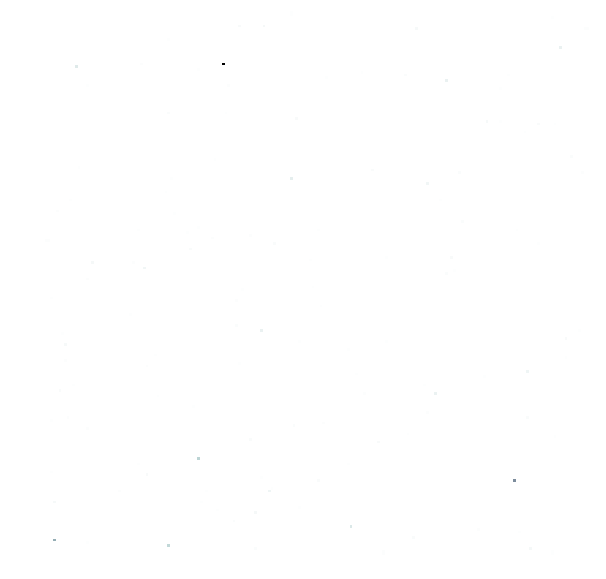

In [329]:
# Simulation for n timesteps
for i in range(1):
    U,V = rk2(U,V,dx,dt)
print('mean k1: ',np.mean(U1),', mean k2: ',np.mean(U2)) 
pp.close("all")
fig,ax = pp.subplots(1,1)
show_patterns(U,ax)
fig

In [328]:
U

array([[ 0.01120231,  0.00481243,  0.01499889, ...,  0.00804793,
         0.00333592,  0.01680767],
       [ 0.01620075,  0.01563261,  0.00345561, ...,  0.00790938,
         0.01842793,  0.00701657],
       [ 0.00177914,  0.01935038,  0.00732198, ...,  0.00893204,
         0.00896455,  0.01132007],
       ..., 
       [ 0.0137271 ,  0.00678995,  0.01230996, ...,  0.00748315,
         0.00463834,  0.00794456],
       [ 0.01096079,  0.01921335,  0.01314946, ...,  0.01014064,
         0.00209586,  0.01658984],
       [ 0.0082154 ,  0.01356289,  0.01170667, ...,  0.01721266,
         0.01406888,  0.00861676]])